# Bank Marketing Campaign Data

## Introduction:

The prediction model uses direct marketing campaign data from a banking institution. Phone calls were used in the marketing campaigns to contact customers in order to determine whether the customer would subscribe to a term deposit. 

The objective of this project is to create a model that will predict whether or not a customer will sign up for the product (bank term deposit) based on the data at hand.


## Data Specifications:

1. Age - Age of the customer.
2. Job - Profession of the customer.
3. Marital Status - Relationship status of the customer.
4. Education - Education level of the customer.
5. Default - / Having a previously broken credit.
6. Housing - Whether customer has a home loan.
7. Loan - Whether the customer has a personal loan.
8. Contact - Whether the customer was contacted on his home or mobile phone.
9. Month - The last month when the customer was contacted.
10. Day - The day when the customer was contacted.
11. Duration - The total time spent on talking to the customer.
12. Campaign - The number of contacts reaching the customer during the current campaign (including the last contact).
13. Pdays: The number of days since the previous campaign, if reached (-1 if it was never reached before).
14. Previous: The number of contacts that reached the customer before this campaign.
15. Poutcome: Previous campaign result, whether successful or not.
16. Deposit: Whether customer has a term deposit or not.

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data

In [2]:
data = pd.read_csv('C:/Data Science Projects/Product Uptake Prediction/bank.csv')

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Checking dataframe info

number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### Checking missing values 

(In this case 'NA's as there are no null values as observed above).

In [4]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

### Outlier detection

In [5]:
from collections import Counter

def detect_outliers(data,features):
    
    outlier_indices = []
    
    for f in features:
        
        # 1st quartile
        Q1 = np.percentile(data[f],25)
        
        # 3rd quartile
        Q3 = np.percentile(data[f],75)
        
        # IQR
        IQR = Q3 - Q1
        
        # Outlier size
        outlier_size = IQR * 1.5
        
        # detect outliers indices
        outlier_list = data[(data[f] < Q1 - outlier_size) | (data[f] > Q3 + outlier_size)].index
        
        # store outlier indices
        outlier_indices.extend(outlier_list)
    
    outlier_indices = Counter(outlier_indices)
    
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

#### Identify outliers based on the features (duration, campaign, and previous) directly linked to the marketing campaign.

In [6]:
data.loc[detect_outliers(data,['duration','campaign','previous'])]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


##### No outlier detected.

##### NB\: Unless outliers are caused by data entry errors, usually outliers should not be removed as they represent the natural occurence of the data.

### Descriptive statistics

#### Numerical variables

In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [8]:
num_features = ['age','balance','day','duration','campaign','pdays','previous']

In [9]:
def area_plot(feature):
    var = data[feature]
       
    pd.crosstab(var,data.deposit).plot(kind="area",figsize=(15,7),color=['#00ccff','#00bb00' ])
    plt.title("{} Distribution".format(feature))
    plt.xlabel("{}".format(feature))
    plt.ylabel('Frequency')
    plt.show()

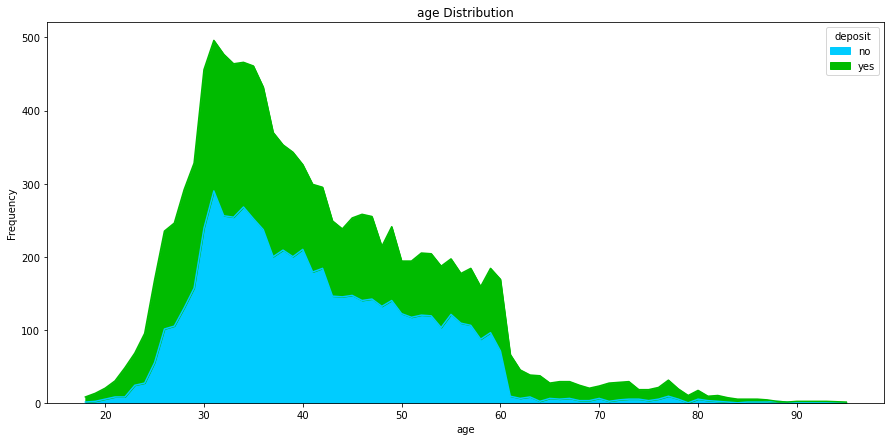

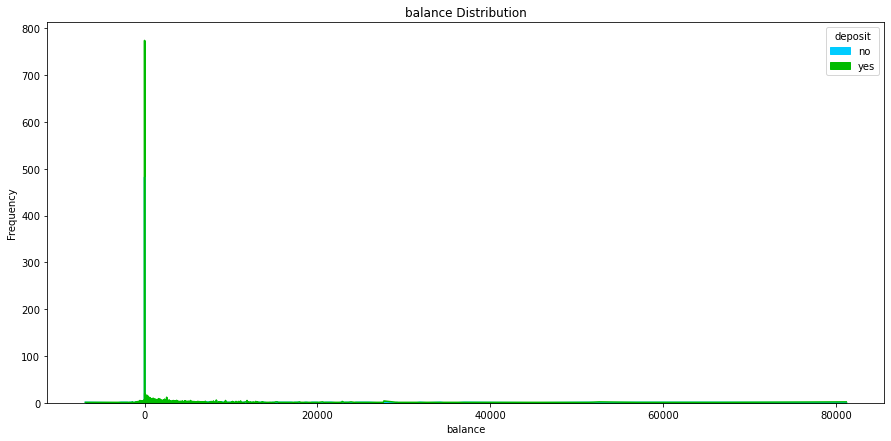

In [10]:
# Considering only age and balance

num_features1 = ['age','balance']

for f in num_features1:
    area_plot(f)

#### Age:

From the age distribution graph above, we can note that the highest number of customers with term deposits range between the ages 30 - 35 years. Also, within the same age range, there are many customers who have not subscribed to a term deposit, hence there is still a huge opportunity to sell this product others customers within this age range.

#### Balance

From the balance distribution graph above, we note that majority of the customers who have subscribed to term deposits have a nearly zero balance. we may observe this more clearly by grouping the customers based on their balances.


In [11]:
# Categorizing the customers by balance

data1 = data.copy()

data1.loc[data1['balance'] >= 10000, 'bal_cat'] = "High_bal"
data1.loc[(data1['balance'] > 2000) & (data1['balance'] < 10000),'bal_cat'] = "Average_bal"
data1.loc[(data1['balance'] >= 0) & (data1['balance'] < 2000), 'bal_cat'] = "Low_bal"
data1.loc[data1['balance'] < 0, 'bal_cat'] = "Negative_bal"

table_bal_cat = pd.crosstab(data1['deposit'], data1['bal_cat']).apply(lambda x: x/x.sum() * 100).round()
table_bal_cat

bal_cat,Average_bal,High_bal,Low_bal,Negative_bal
deposit,,,,
no,42.0,41.0,54.0,69.0
yes,58.0,59.0,46.0,31.0


From table above we can note that nearly 60% of those customers having average and high balances (over 2,000)  have a term deposit. Important to note is that quite a significant proportion of customers with low and negative balances also have a term deposit. This indicates that the marketing team can target customers with any balance amount.

#### Categorical variables

In [12]:
def bar_plot(feature):
    var = data[feature]
       
    pd.crosstab(var,data.deposit).plot(kind="bar",figsize=(15,7),color=['#00ccff','#00bb00' ])
    plt.title("{} distribution".format(feature))
    plt.xlabel("{}".format(feature))
    plt.ylabel('Frequency')
    plt.show()

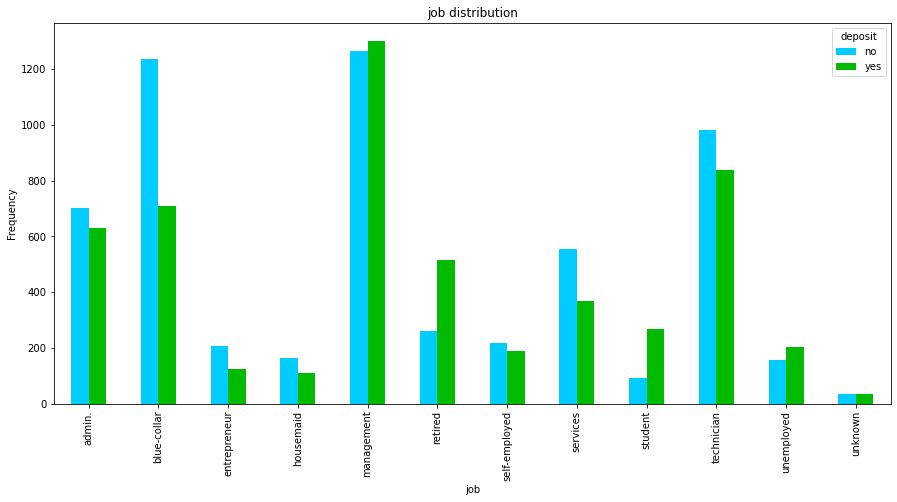

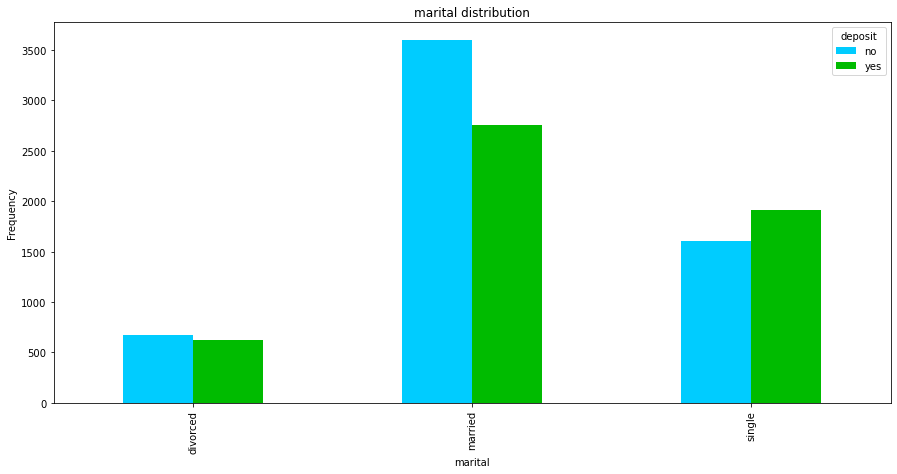

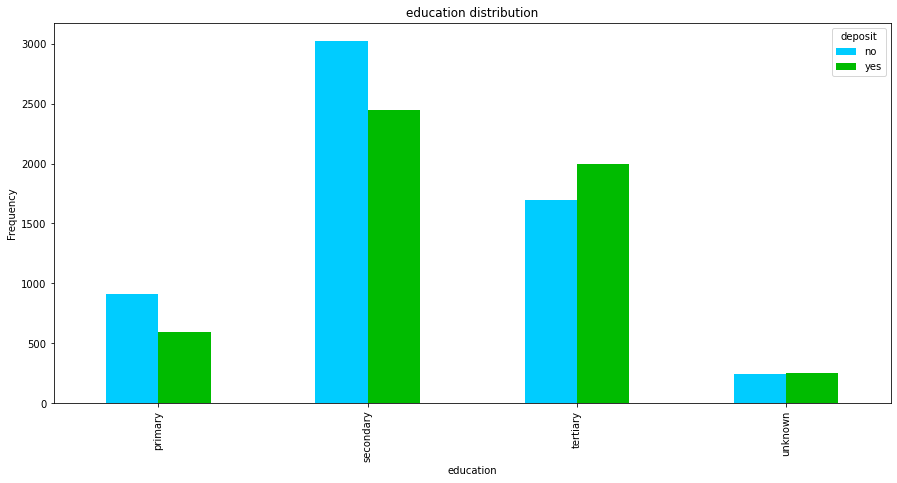

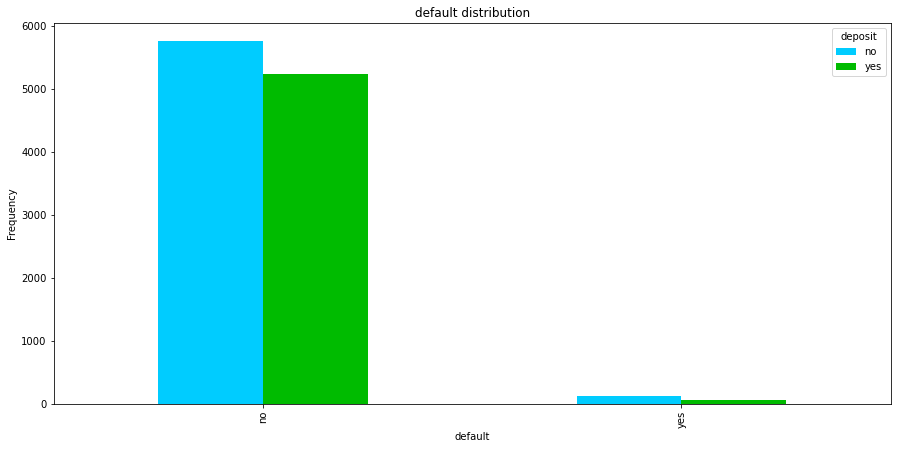

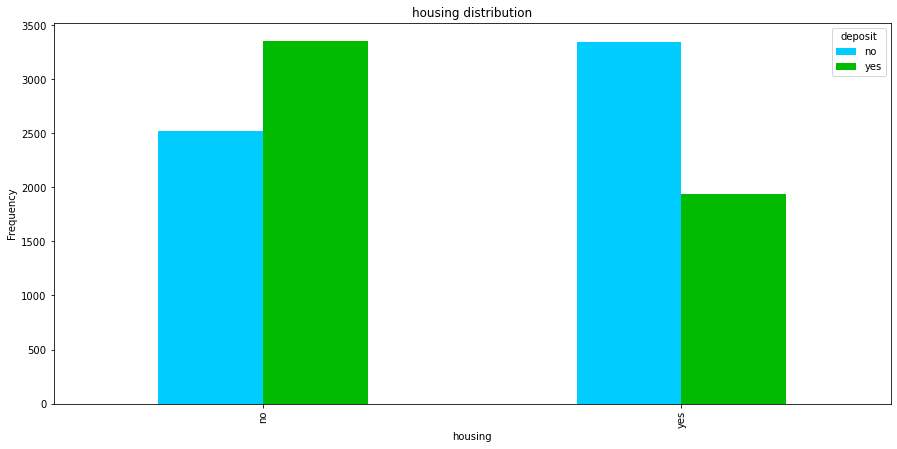

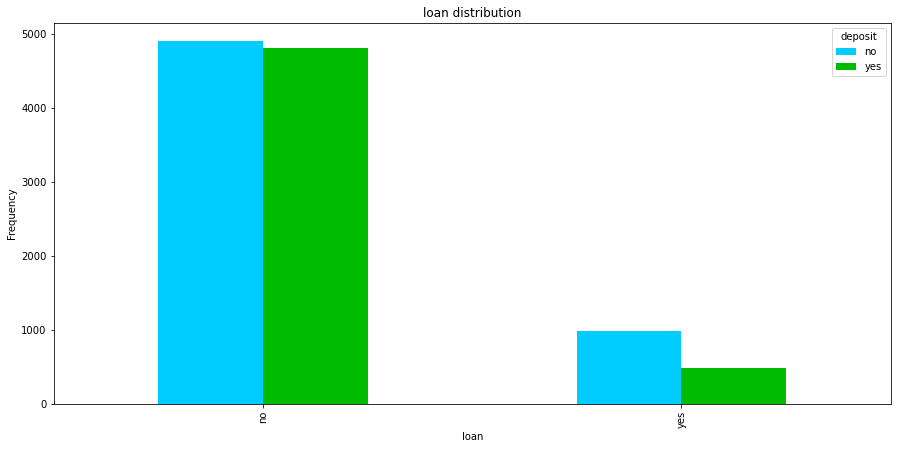

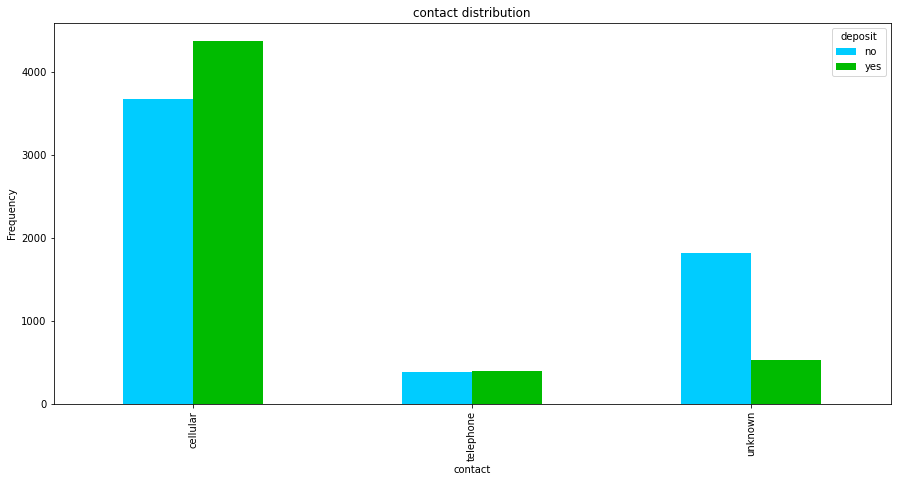

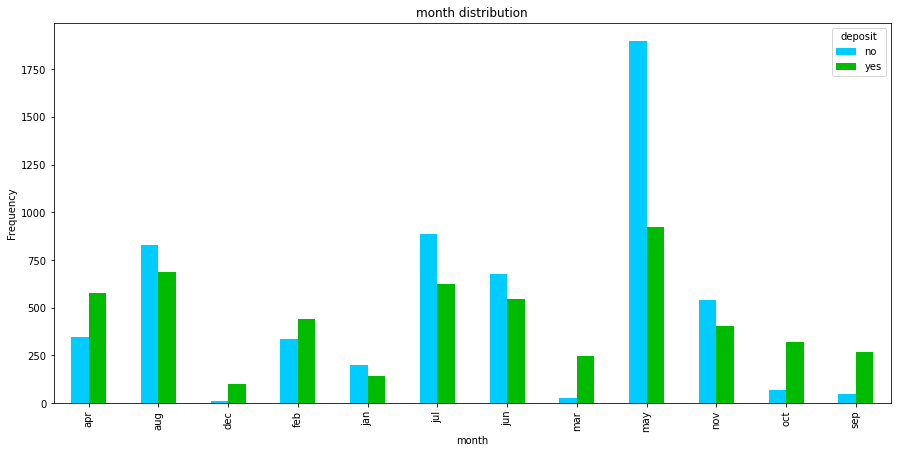

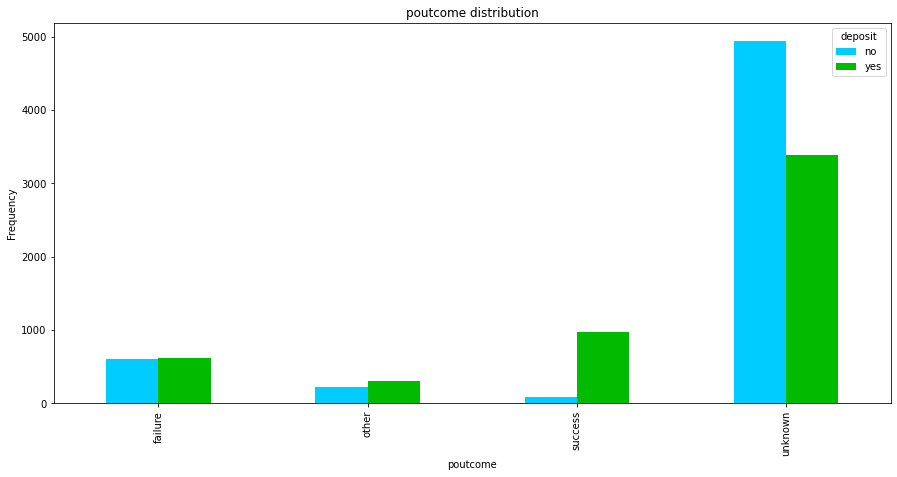

In [13]:
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month','poutcome']

for f in cat_features:
    bar_plot(f)
    
    

The graphs above can provide an overview of the characteristics of customers with high number of term deposits. For example, from the first graph, we can note that customers with a management job have the highest number of term deposits and so on. For a detailed summary of the exact numbers and subscription proportions of each variable see below.

In [14]:
for f in cat_features:
    print(pd.crosstab(data['deposit'], data[f]).apply(lambda x: x/x.sum() * 100).round(), '\n')
    print(data.groupby(f).size().sort_values(ascending=False), '\n')
          
           

job      admin.  blue-collar  entrepreneur  housemaid  management  retired  \
deposit                                                                      
no         53.0         64.0          62.0       60.0        49.0     34.0   
yes        47.0         36.0          38.0       40.0        51.0     66.0   

job      self-employed  services  student  technician  unemployed  unknown  
deposit                                                                     
no                54.0      60.0     25.0        54.0        43.0     51.0  
yes               46.0      40.0     75.0        46.0        57.0     49.0   

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
dtype: int64 

marital  divorced  married  single
deposit                           
no           52.0     57

## Correlations

<AxesSubplot:>

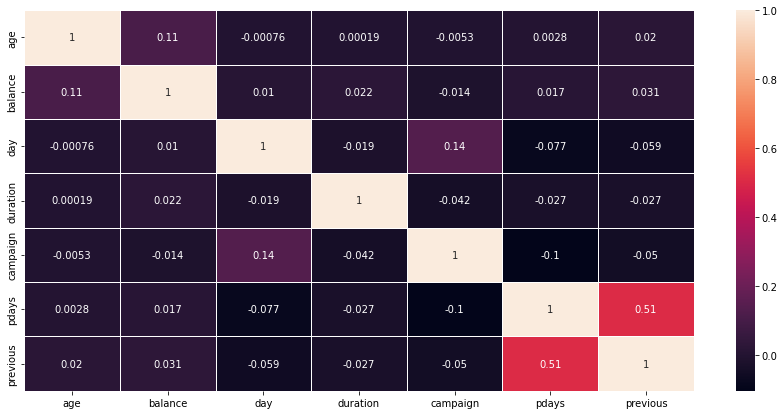

In [15]:
fig, ax = plt.subplots(figsize=(15,7))         # Sample figsize in inches
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

Majority of the variables have weak positive or negative correlations except the relationship between the 'pdays' and 'previous' variables (r=0.51).

## Data Pre-processing before Modelling

### One hot encoding

In [16]:
# Converting deposit column values to numerical values 

data['deposit'].replace(['yes', 'no'],[1, 0], inplace=True)

# Removing negative values for pdays

data['pdays'].replace([-1],[0], inplace=True)

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,0,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,0,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,0,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,0,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,0,0,unknown,1


In [17]:
# Encoding the categorical values only

new_cat_features = pd.get_dummies(data[cat_features], drop_first=False)

new_cat_features.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [18]:
# Combining numerical and categorical independent variables

df2 = pd.concat([data, new_cat_features], axis=1)

data_main = df2.drop(['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'poutcome'], axis=1)
    
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   balance              11162 non-null  int64
 2   day                  11162 non-null  int64
 3   duration             11162 non-null  int64
 4   campaign             11162 non-null  int64
 5   pdays                11162 non-null  int64
 6   previous             11162 non-null  int64
 7   deposit              11162 non-null  int64
 8   job_admin.           11162 non-null  uint8
 9   job_blue-collar      11162 non-null  uint8
 10  job_entrepreneur     11162 non-null  uint8
 11  job_housemaid        11162 non-null  uint8
 12  job_management       11162 non-null  uint8
 13  job_retired          11162 non-null  uint8
 14  job_self-employed    11162 non-null  uint8
 15  job_services         11162 non-null  uint8
 16  job_student          1

## Spliting the dataset

In [19]:
# Spliting dataset into independent (X) and dependent (y) variables

X=data_main.drop(['deposit'], axis=1)

y=data_main['deposit']

## Test Train Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

## Modeling

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score


### Logistic Regression

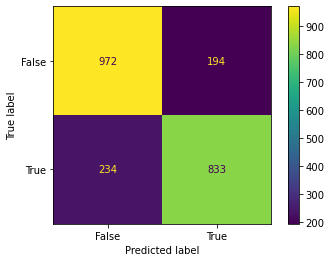

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1166
           1       0.81      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233

Logistic Regression accuracy:  80.83
F1-Score:  79.56
Cohen Kappa score:  61.53


In [41]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train,y_train)

y_pred = lr_model.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

print(classification_report(y_test,y_pred))

acc = accuracy_score(y_test,y_pred)*100
print("Logistic Regression accuracy: ",acc.round(2))

f1=f1_score(y_test,y_pred)*100
print("F1-Score: ",f1.round(2))

cohen_kappa = cohen_kappa_score(y_test, y_pred)*100
print('Cohen Kappa score: ',cohen_kappa.round(2))

### Naive Bayes

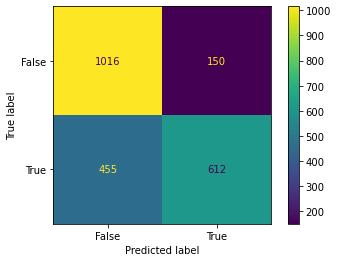

              precision    recall  f1-score   support

           0       0.69      0.87      0.77      1166
           1       0.80      0.57      0.67      1067

    accuracy                           0.73      2233
   macro avg       0.75      0.72      0.72      2233
weighted avg       0.74      0.73      0.72      2233

Naive Bayes accuracy:  72.91
F1-Score:  66.92
Cohen Kappa score:  45.04


In [27]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train,y_train)

y_pred = nb_model.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

print(classification_report(y_test,y_pred))

acc = accuracy_score(y_test,y_pred)*100
print("Naive Bayes accuracy: ",acc.round(2))

f1=f1_score(y_test,y_pred)*100
print("F1-Score: ",f1.round(2))


cohen_kappa = cohen_kappa_score(y_test, y_pred)*100
print('Cohen Kappa score: ',cohen_kappa.round(2))

### Support Vector Machine (SVM)

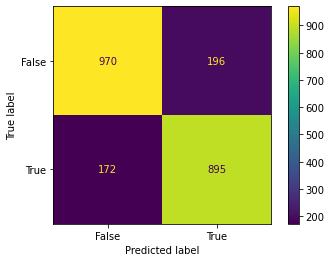

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1166
           1       0.82      0.84      0.83      1067

    accuracy                           0.84      2233
   macro avg       0.83      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233

SVM accuracy:  83.52
F1-Score:  82.95
Cohen Kappa score:  67.01


In [29]:
from sklearn.svm import SVC

svc_model = SVC(kernel = 'rbf', random_state = 0)

svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

print(classification_report(y_test,y_pred))

acc = accuracy_score(y_test,y_pred)*100
print("SVM accuracy: ",acc.round(2))

f1=f1_score(y_test,y_pred)*100
print("F1-Score: ",f1.round(2))


cohen_kappa = cohen_kappa_score(y_test, y_pred)*100
print('Cohen Kappa score: ',cohen_kappa.round(2))

### Decision Trees

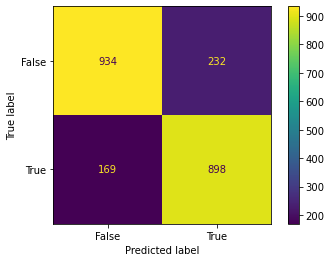

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1166
           1       0.79      0.84      0.82      1067

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233

Decision tree accuracy:  82.04
F1-Score:  81.75
Cohen Kappa score:  64.1


In [33]:
from sklearn.tree import DecisionTreeClassifier

dt_model= DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0, min_samples_leaf=10)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

print(classification_report(y_test,y_pred))

acc = accuracy_score(y_test,y_pred)*100
print("Decision tree accuracy: ",acc.round(2))

f1=f1_score(y_test,y_pred)*100
print("F1-Score: ",f1.round(2))


cohen_kappa = cohen_kappa_score(y_test, y_pred)*100
print('Cohen Kappa score: ',cohen_kappa.round(2))

### Random Forest

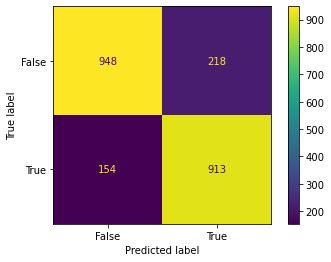

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1166
           1       0.81      0.86      0.83      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233

Random Forest accuracy:  83.34
F1-Score:  83.08
Cohen Kappa score:  66.7


In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

print(classification_report(y_test,y_pred))

acc = accuracy_score(y_test,y_pred)*100
print("Random Forest accuracy: ",acc.round(2))

f1=f1_score(y_test,y_pred)*100
print("F1-Score: ",f1.round(2))

cohen_kappa = cohen_kappa_score(y_test, y_pred)*100
print('Cohen Kappa score: ',cohen_kappa.round(2))

### K-Nearest Neighbors

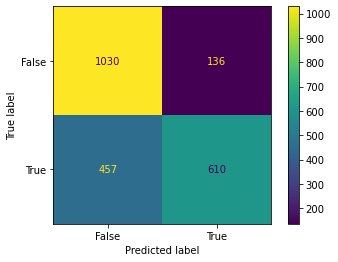

              precision    recall  f1-score   support

           0       0.69      0.88      0.78      1166
           1       0.82      0.57      0.67      1067

    accuracy                           0.73      2233
   macro avg       0.76      0.73      0.72      2233
weighted avg       0.75      0.73      0.73      2233

KNN accuracy:  73.44
F1-Score:  67.29
Cohen Kappa score:  46.09


In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 4, algorithm='ball_tree')

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

print(classification_report(y_test,y_pred))

acc = accuracy_score(y_test,y_pred)*100
print("KNN accuracy: ",acc.round(2))

f1=f1_score(y_test,y_pred)*100
print("F1-Score: ",f1.round(2))

cohen_kappa = cohen_kappa_score(y_test, y_pred)*100
print('Cohen Kappa score: ',cohen_kappa.round(2))

### Gradient Boosting Classifier

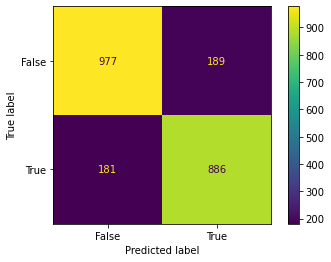

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1166
           1       0.82      0.83      0.83      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233

GBC accuracy:  83.43
F1-Score:  82.73
Cohen Kappa score:  66.81


In [37]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.8, max_depth=2, random_state=0)

gbc_model.fit(X_train, y_train)

y_pred = gbc_model.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

print(classification_report(y_test,y_pred))

acc = accuracy_score(y_test,y_pred)*100
print("GBC accuracy: ",acc.round(2))

f1=f1_score(y_test,y_pred)*100
print("F1-Score: ",f1.round(2))

cohen_kappa = cohen_kappa_score(y_test, y_pred)*100
print('Cohen Kappa score: ',cohen_kappa.round(2))

#### SVM model produced the highest accuracy score of 83.52 but K-Nearest neighbors had the lowest number of false positives at 136. 

#### Depending on the business strategy model, the marketing department could select the most ideal model based on the results of the accuracy, f1 score, and Cohen-Kappa score.